In [1]:
####################  Data Analysis & Calculation  #####################3
import numpy as np   
import pandas as pd  
import datetime  

####################  Visuvalization & plotting  #####################3
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  
#################### Machine Learning #####################3
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 

In [2]:
new = pd.read_csv(r"C:\Users\Dell\Desktop\Machine Learning\Boosting\healthcare.csv")
new.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
print ("Rows     : " ,new.shape[0])
print ("Columns  : " ,new.shape[1])


Rows     :  5110
Columns  :  12


### Missing Value

In [8]:
new.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
new.bmi.fillna(new.bmi.mean(),inplace=True) # one column at a time bb

In [10]:
new.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Removing Irrelavent Variable 

In [11]:
new = new.drop(['id'],axis=1)
new.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [12]:
# Numeric columns
new_num = new[new.select_dtypes(include=[np.number]).columns.tolist()]
new_num.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1


In [13]:
new_dummies = new[new.select_dtypes(include=['object']).columns.tolist()]
new_dummies.head(3)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked


In [14]:
from sklearn.preprocessing import LabelEncoder
new_dummies=new_dummies.apply(LabelEncoder().fit_transform)
new_dummies.head(3)
# label in ascending order

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2


In [15]:
new_combined = pd.concat([new_num, new_dummies],axis=1)
new_combined.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.600000,1,1,1,2,1,1
1,61.0,0,0,202.21,28.893237,1,0,1,3,0,2
2,80.0,0,1,105.92,32.500000,1,1,1,2,0,2
3,49.0,0,0,171.23,34.400000,1,0,1,2,1,3
4,79.0,1,0,174.12,24.000000,1,0,1,3,0,2


# Data Partition-1

In [16]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
X = new_combined.drop('stroke',axis=1)
y = new_combined[["stroke"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =222)

In [17]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the Test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 4088.
The number of samples into the Test data is 1022.


# Model 2 -GBM (Gradient boosting)

### Model 2 -GBM (Gradient boosting)

abc=pd.DataFrame(gscv_GBM.cv_results_)
abc=abc.loc[:,['param_learning_rate','mean_test_score']]
abc.head()

In [19]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [2,4,5], # number of tress
                    'max_depth':    [2, 3],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'min_samples_leaf':[100,200,270], ## child
                    'min_samples_split':[50,70,80]} #parent 

10,3  -- 5 times -- best = 78%
10,5  -- 5 times -- best = 88%  --- selected
50,3  -- 5 times -- best = 68%
50,5  -- 5 times -- best = 86%

In [20]:

# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier(random_state=10,loss="deviance",criterion="mse")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=5,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [2, 3],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [2, 4, 5]},
             scoring='accuracy', verbose=1)

In [21]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.8, 'max_depth': 2, 'min_samples_leaf': 270, 'min_samples_split': 50, 'n_estimators': 4}


In [22]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, max_depth=2, min_samples_leaf=270,
                           min_samples_split=50, n_estimators=4)

In [23]:
# Prediction
train_pred = final_mod_GBM.predict(x_train)
test_pred = final_mod_GBM.predict(x_test)

In [24]:
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Confusion Matrix Train Data (2 Model)

In [25]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3881
           1       0.00      0.00      0.00       207

    accuracy                           0.95      4088
   macro avg       0.47      0.50      0.49      4088
weighted avg       0.90      0.95      0.92      4088



# Confusion Matrix Test Data (2 Model) 

In [26]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.00      0.00      0.00        42

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022



# Importance Feature

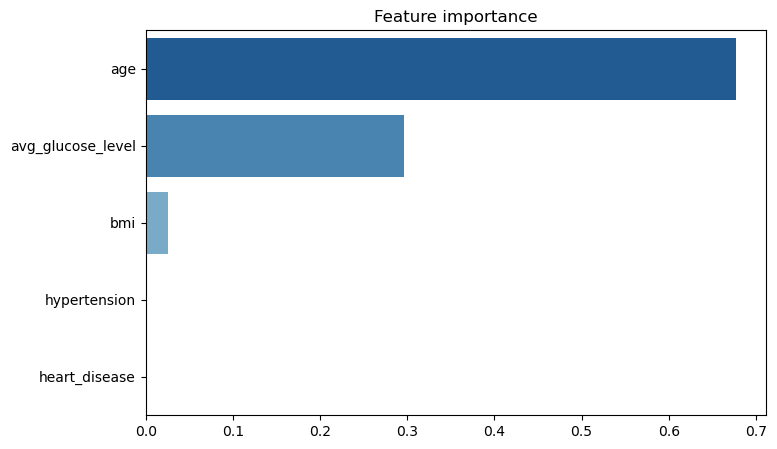

In [27]:
# Plot features importances
imp = pd.Series(data=final_mod_GBM.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')


# Gradiant Boosting Tree

In [28]:
pip install pydotplus


     -------------------------------------- 278.7/278.7 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=44f73c07835ab41b7da566764632c12803bf9e3ccead9a1d555cbc71c51f37d5
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


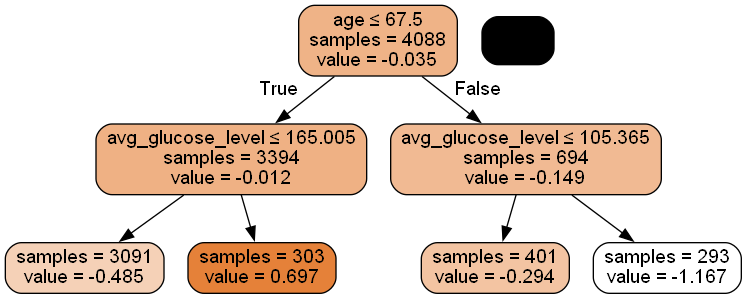

In [29]:
from sklearn.tree import export_graphviz
sub_tree = final_mod_GBM.estimators_[1, 0] #0 to 99  # Model ( Final_mod_GBM) = Give Tree
stroke=['Yes','No']
feature_list = list(X.columns)

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=stroke,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())


# Finished

# Business Submission

In [30]:
import os 
os.chdir(r"C:\Users\Dell\Desktop\Machine Learning\Boosting")

In [31]:
import pickle
pickle.dump(final_mod_GBM, open('GBModel.pkl','wb')) # model = final_mod_GBM

In [32]:
abc=pickle.load(open('GBModel.pkl','rb'))

In [33]:
abc.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)